In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import plot_roc_curve

%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('data/Task2data.csv')
y = df.pop('fraud')

In [3]:
X_main, X_holdout, y_main, y_holdout = train_test_split(df, y, random_state=7, stratify=y)

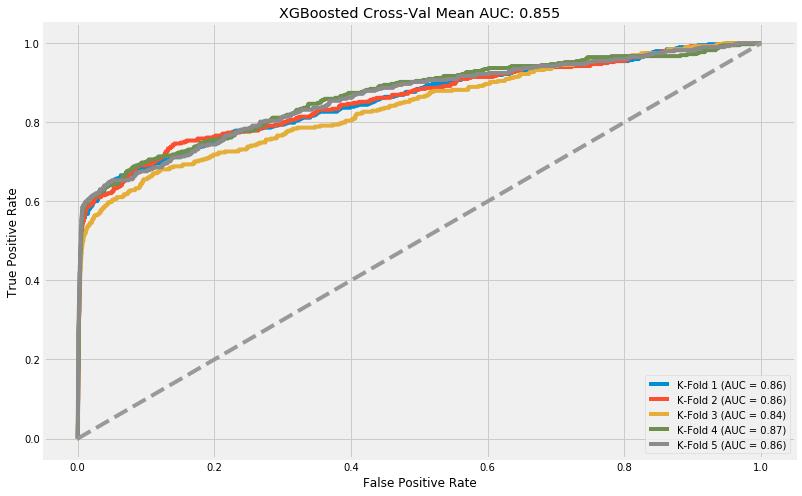

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

kf = StratifiedKFold(n_splits=5, shuffle=True)

xgb = XGBClassifier(booster='dart', subsample=.8,
                    learning_rate=0.05, max_delta_step=0, max_depth=8,
                    min_child_weight=1, n_estimators=1500, n_jobs=-1)
AUCs = []

for i, (train_index, test_index) in enumerate(kf.split(X_main, y_main)):
    X_train, X_test = X_main.iloc[train_index], X_main.iloc[test_index]
    y_train, y_test = y_main.iloc[train_index], y_main.iloc[test_index]

    xgb.fit(X_train, y_train)
    plot_roc_curve(xgb, X_test, y_test.values, name=f'K-Fold {i+1}', ax=ax)
    AUCs.append(metrics.roc_auc_score(y_test.values, xgb.predict_proba(X_test)[:,1]))
    
mean_auc = round(np.mean(AUCs), 3)
ax.set_title(f'XGBoosted Cross-Val Mean AUC: {mean_auc}')  
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')

In [4]:
import pickle 
xgb.fit(X_main, y_main)

In [8]:
with open('models/xgboost.pkl', 'wb') as f:
    pickle.dump(xgb, f)

In [9]:
xgb.predict_proba(X_holdout)

array([[9.9976528e-01, 2.3473508e-04],
       [9.9935353e-01, 6.4645894e-04],
       [9.9861121e-01, 1.3887964e-03],
       ...,
       [9.9997258e-01, 2.7411188e-05],
       [9.9983311e-01, 1.6688972e-04],
       [9.9570704e-01, 4.2929603e-03]], dtype=float32)